# 1.0 Project Overview
## 1.1 Introduction

The project aims at drawing insights from the NTSB dataset to determine the kind of aircraft to purchase and operate, commercial and private enterprises  based on the potential risks of different aircrafts. The criteria is finding the aircraft with the lowest risk to recommend. This project will, therefore adopt Cross Industry Standard Prcocedures- Data Mining(CRISP-DM) for the aviation industry.

# 2.0 Business Understanding
## 2.1 Objective

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## 2.2 Empirical Summary
Conventionally, the choice of the aircraft to purchase and operate is guided by various factors. This includes the investor budget, plane type and engine size or configurations, interior and layouts, passengers and business requirements, destinations or routes, operational and maintenance costs, return on investment, and regulatory and safety requirements(https://aircraftmaintenancestands.com/blog, https://skyaviationholdings.com/, https://www.faa.gov/, International Civil Aviation Organization(ICAO))

# 3.0 The Data

The data provided for this analysis is from the National Transportation Safety Board(NTSB) database that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# Importing python libraries

In [10]:
#importing relevant python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
# Loading AviationData.csv dataset as data1 dataframe
data1 = pd.read_csv('AviationData.csv', encoding= 'ISO 8859-1')


c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
# Loading USState_Codes.csv dataset as data2 dataframe
data2 = pd.read_csv('USState_Codes.csv')

# 3.1 Data Understanding

### Preview of data1 dataframe.
Data preview before preparation, serves as familiarization with its features and be able to map out the essential features relevant to the scope of the problem statement. This invokes pertinent questions to draw insights from the data which gives confidence in data-driven decision making that guides business strategic direction.

In [13]:
# # Display of the first 5 rows of the dataframe
data1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [14]:
# Checking dataset information
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [15]:
# Checking features to note the essential ones to answer research question
data1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [16]:
# Concise summary (numerical features)
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [17]:
# Summary of categoricals features
data1.describe(include='object').T

,count,unique,top,freq
Event.Id,88889,87951,20001214X45071,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,DCA22WA167,2
Event.Date,88889,14782,1984-06-30,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50249,10375,NONE,1488
Airport.Name,52790,24871,Private,240


In [18]:
# shape of the dataframe (rows, cols)
data1.shape

(88889, 31)

In [19]:
data1['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [20]:
data1['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [21]:
data1['Make'].values

array(['Stinson', 'Piper', 'Cessna', ..., 'AMERICAN CHAMPION AIRCRAFT',
       'CESSNA', 'PIPER'], dtype=object)

In [22]:
data1['Model'].values

array(['108-3', 'PA24-180', '172M', ..., '8GCBC', '210N', 'PA-24-260'],
      dtype=object)

In [23]:
for column in data1:
  unique_values = data1[column].unique()
  print(f"Unique values in column '{column}','\n': {unique_values}",'\n')

Unique values in column 'Event.Id','
': ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

Unique values in column 'Investigation.Type','
': ['Accident' 'Incident'] 

Unique values in column 'Accident.Number','
': ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097'] 

Unique values in column 'Event.Date','
': ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29'] 

Unique values in column 'Location','
': ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, '] 

Unique values in column 'Country','
': ['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' '

### Preview of data2 dataframe

In [24]:
# preview data in data2 dataframe
data2.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [25]:
# Checking data information
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


Observation: 
The dataframe has all feature as object dtype

## 3.2 Refining Problem Statement.
My company contemplates a dive into aviation industry but limited in the knowledge and experience in the sector. Conventionally a number of factors are considered in settling on the aircrafts to purchase and operate as seen in the empirical review summary above. 
The objective therefore, is to able to recommend on the kind of aircraft to invest in based on the scope set out. The     
    > Time frame of 1962 to 2023 (Event.Date feature)
    
    > 

## 3.2.1 Metrics of Success

My project will be successful if, using the provided data and scope, be able to find the aircraft of commercial and private enterprises with the lowest risks and make recommend  to aid the investment decision making.

# 4.0 Data Preparation

## 4.1 Data Cleaning
This phase involves checking on data validity(relevance), accuracy(removal of outliers), completeness...

and treatment of missing values and duplicates. Duplicates are removed while missing values are either dropped/deleted if by so doing do not significantly impact on the clean dataset, or values imputed. 

In [26]:
# Making a copy of the dataset
df = data1.copy(deep= True)

In [27]:
# Checking columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### 4.1.1 Validity check

This achieved by checking irrelevant features and removing them or selecting the revelant features 

In [28]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [29]:
#Selecting the relevant features for analysis
df1 = df[['Event.Date','Location','Make','Model','Purpose.of.flight','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Broad.phase.of.flight']]
df1.head(2)

,Event.Date,Location,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Personal,2.0,0.0,0.0,0.0,Cruise
1,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,Unknown


In [30]:
#Changing columns to lower case and removing white spaces for uniformity
df1.columns = df1.columns.str.lower().str.replace(' ', '')
df1.columns

Index(['event.date', 'location', 'make', 'model', 'purpose.of.flight',
       'total.fatal.injuries', 'total.serious.injuries',
       'total.minor.injuries', 'total.uninjured', 'broad.phase.of.flight'],
      dtype='object')

In [31]:
#Rename 'broad.phase.of.flight' column as 'phase.of.flight'
df1.rename(columns = {'broad.phase.of.flight': 'phase.of.flight'}, inplace = True )

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [32]:
df1.columns

Index(['event.date', 'location', 'make', 'model', 'purpose.of.flight',
       'total.fatal.injuries', 'total.serious.injuries',
       'total.minor.injuries', 'total.uninjured', 'phase.of.flight'],
      dtype='object')

In [33]:
df1.dtypes

event.date                 object
location                   object
make                       object
model                      object
purpose.of.flight          object
total.fatal.injuries      float64
total.serious.injuries    float64
total.minor.injuries      float64
total.uninjured           float64
phase.of.flight            object
dtype: object

### 4.1.2 Data completeness

Checking for missing values and treating them. Missing values are either dropped/deleted if by so doing do not significantly impact on the clean dataset, or values imputed.

In [34]:
#Checking for missing values
df1.isna().sum()

event.date                    0
location                     52
make                         63
model                        92
purpose.of.flight          6192
total.fatal.injuries      11401
total.serious.injuries    12510
total.minor.injuries      11933
total.uninjured            5912
phase.of.flight           27165
dtype: int64

In [35]:
# Dropping missing values for 'purpose.of.flight'
df1.dropna(subset= ["purpose.of.flight"], inplace=True)

<ipython-input-35-262cffc26943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset= ["purpose.of.flight"], inplace=True)


In [36]:
df1.isna().sum()

event.date                    0
location                     42
make                         21
model                        41
purpose.of.flight             0
total.fatal.injuries      10125
total.serious.injuries    11185
total.minor.injuries      10578
total.uninjured            5363
phase.of.flight           22070
dtype: int64

In [37]:
#
df1.dropna(inplace=True)

<ipython-input-37-437018177d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [38]:
df1.isna().sum()

event.date                0
location                  0
make                      0
model                     0
purpose.of.flight         0
total.fatal.injuries      0
total.serious.injuries    0
total.minor.injuries      0
total.uninjured           0
phase.of.flight           0
dtype: int64

### 4.1.3 Data accuracy

Checking for outlier values in the data that distorts its accuracy. This is mitigated by drop/removing outliers

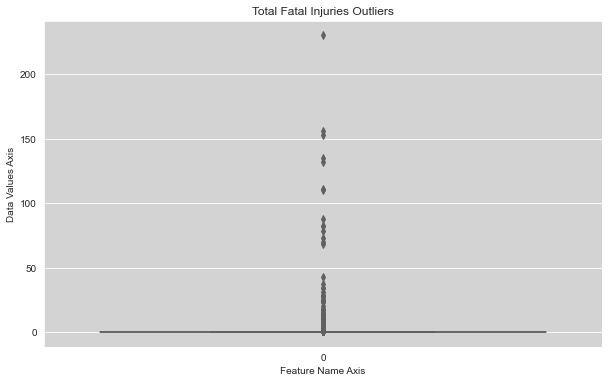

In [39]:
#Checking for outliers visually using plots for numerical features
plt.figure(figsize= (10, 6))
sns.set_style('darkgrid', {'axes.facecolor': 'lightgrey'})
sns.boxplot(data =df1['total.fatal.injuries'], palette='Blues')
plt.title("Total Fatal Injuries Outliers")
plt.xlabel("Feature Name Axis")
plt.ylabel("Data Values Axis");

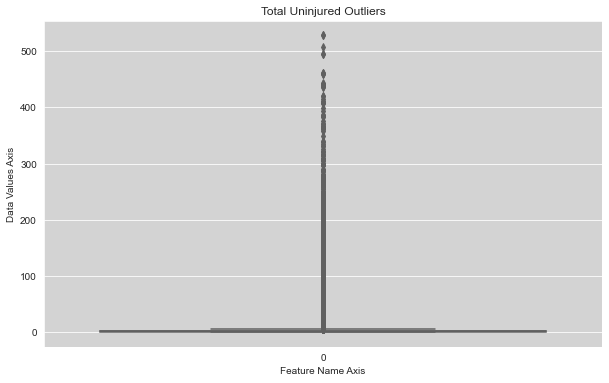

In [40]:
#Checking for outliers in total.uninjured
plt.figure(figsize= (10, 6))
sns.set_style('darkgrid', {'axes.facecolor': 'lightgrey'})
sns.boxplot(data =df1['total.uninjured'], palette='Blues')
plt.title("Total Uninjured Outliers")
plt.xlabel("Feature Name Axis")
plt.ylabel("Data Values Axis");

In [41]:
'''
numerical_features = df1.select_dtypes(include=['number'])
fig,axes = plt.subplots(nrows=2,ncols= len(numerical_features.columns), figsize=(8,6))

for ax,column in zip(axes,numerical_features.columns):
    numerical_features.boxplot(column= column, ax=ax, color='blue')
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

    plt.tight_layout();
'''

"\nnumerical_features = df1.select_dtypes(include=['number'])\nfig,axes = plt.subplots(nrows=2,ncols= len(numerical_features.columns), figsize=(8,6))\n\nfor ax,column in zip(axes,numerical_features.columns):\n    numerical_features.boxplot(column= column, ax=ax, color='blue')\n    ax.set_title(column)\n    ax.set_xlabel('')\n    ax.set_ylabel('')\n\n    plt.tight_layout();\n"

In [42]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
total.fatal.injuries,48425.0,0.391554,2.296657,0.0,0.0,0.0,0.0,230.0
total.serious.injuries,48425.0,0.202974,0.828788,0.0,0.0,0.0,0.0,81.0
total.minor.injuries,48425.0,0.345379,1.725448,0.0,0.0,0.0,0.0,171.0
total.uninjured,48425.0,4.050697,23.148597,0.0,0.0,1.0,2.0,528.0


In [43]:
df1.shape

(48425, 10)

### 4.1.4 Data consistency

Consistency is achieved through removal of duplicates in the dataframe

In [44]:
#Checking for duplicates
df1.duplicated().sum()

40

In [45]:
#Removing duplicates
clean_df1=df1.drop_duplicates()

In [46]:
#preview clean_df1
clean_df1

,event.date,location,make,model,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Personal,2.0,0.0,0.0,0.0,Cruise
1,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,Unknown
3,1977-06-19,"EUREKA, CA",Rockwell,112,Personal,2.0,0.0,0.0,0.0,Cruise
6,1981-08-01,"COTTON, MN",Cessna,180,Personal,4.0,0.0,0.0,0.0,Unknown
7,1982-01-01,"PULLMAN, WA",Cessna,140,Personal,0.0,0.0,0.0,2.0,Takeoff
...,...,...,...,...,...,...,...,...,...,...
63893,2007-12-26,"SARASOTA, FL",Mooney,M20E,Personal,0.0,0.0,2.0,0.0,Takeoff
63896,2007-12-26,"Aspen, CO",Piper,PA-46-310P,Personal,0.0,0.0,0.0,4.0,Climb
63900,2007-12-28,"MURRIETA, CA",Hein,Sonex,Personal,0.0,1.0,0.0,0.0,Cruise
63906,2007-12-29,"Crowley, TX",Althouse,RAF 2000 GTX,Personal,2.0,0.0,0.0,0.0,Maneuvering


### 4.1.5 Data Uniformity

Involves feature engineering

In [47]:
#Required is to filter data within the set time frame on 'Event.Date' attribute
clean_df1['event.date'] = pd.to_datetime(clean_df1['event.date'])


#filtering dataframe within date(1962-2023 range
start_date = '1962-01-01'
end_date = '2023-01-01'

clean_df1=clean_df1.loc[(clean_df1['event.date'] >= start_date) & (clean_df1['event.date'] <= end_date)]

<ipython-input-47-777fa33cc46c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df1['event.date'] = pd.to_datetime(clean_df1['event.date'])


In [48]:
clean_df1.head()

,event.date,location,make,model,purpose.of.flight,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,phase.of.flight
1,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Personal,4.0,0.0,0.0,0.0,Unknown
3,1977-06-19,"EUREKA, CA",Rockwell,112,Personal,2.0,0.0,0.0,0.0,Cruise
6,1981-08-01,"COTTON, MN",Cessna,180,Personal,4.0,0.0,0.0,0.0,Unknown
7,1982-01-01,"PULLMAN, WA",Cessna,140,Personal,0.0,0.0,0.0,2.0,Takeoff
8,1982-01-01,"EAST HANOVER, NJ",Cessna,401B,Business,0.0,0.0,0.0,2.0,Landing


In [49]:
clean_df1['make'] = clean_df1['make'].str.title()

<ipython-input-49-d9038426f4ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df1['make'] = clean_df1['make'].str.title()


In [50]:
clean_df1['make'].value_counts()

Cessna             16848
Piper               9103
Beech               3159
Bell                1473
Grumman              942
                   ...  
Gaston/Lakes           1
Dean R. Fellows        1
Madsen/Rans            1
Witlock                1
Pitcher                1
Name: make, Length: 3166, dtype: int64

In [51]:
#Renaming columns
df.rename(columns= lambda x: x.replace('.', '_').lower(), inplace=True)